In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
system_results = pd.read_csv("translations_scores/system_final_test.csv")

C:\Users\kajet\AppData\Local\Temp\ipykernel_33424\4041310882.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


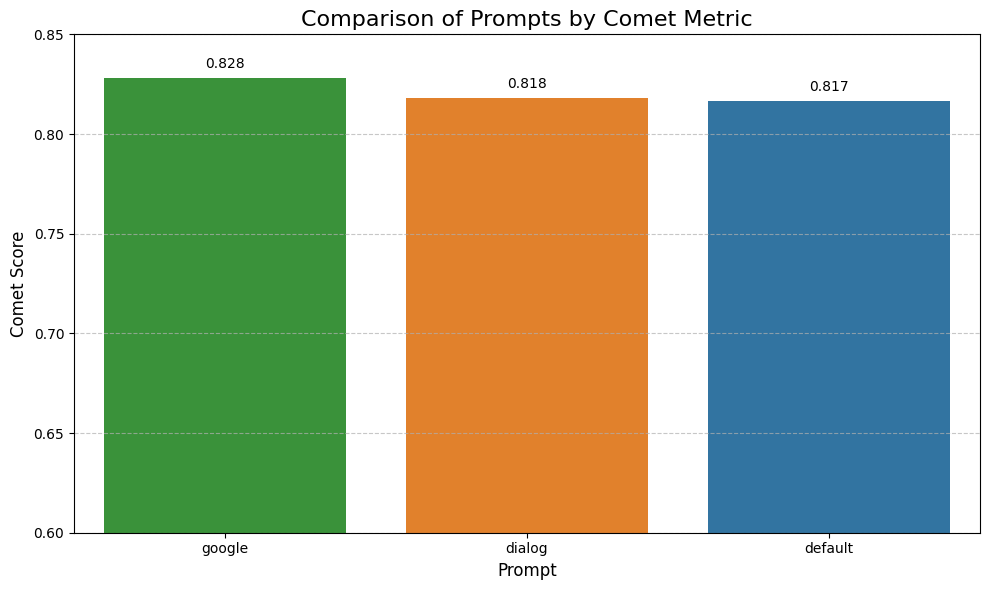

C:\Users\kajet\AppData\Local\Temp\ipykernel_33424\4041310882.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


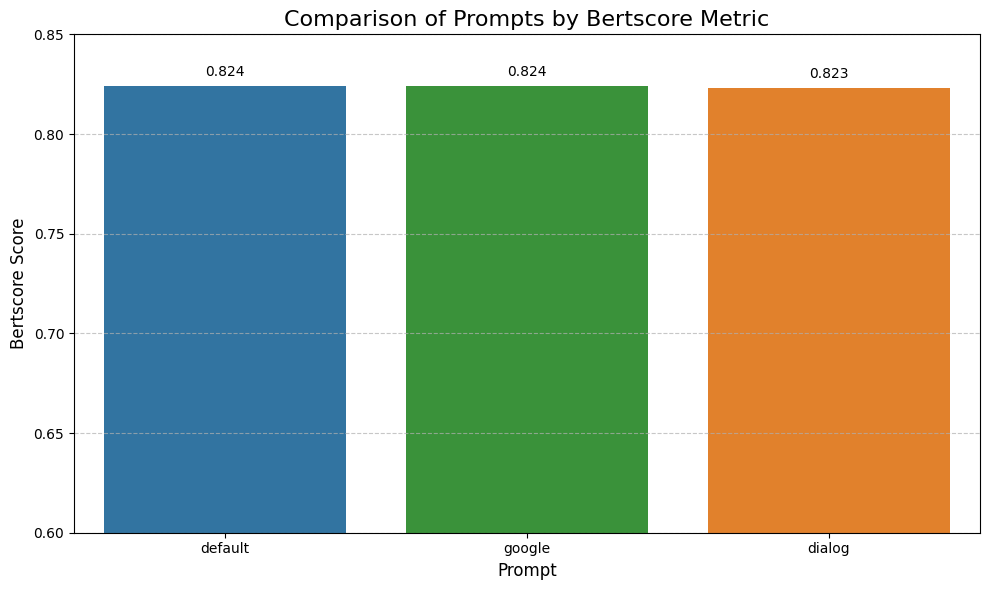

C:\Users\kajet\AppData\Local\Temp\ipykernel_33424\4041310882.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


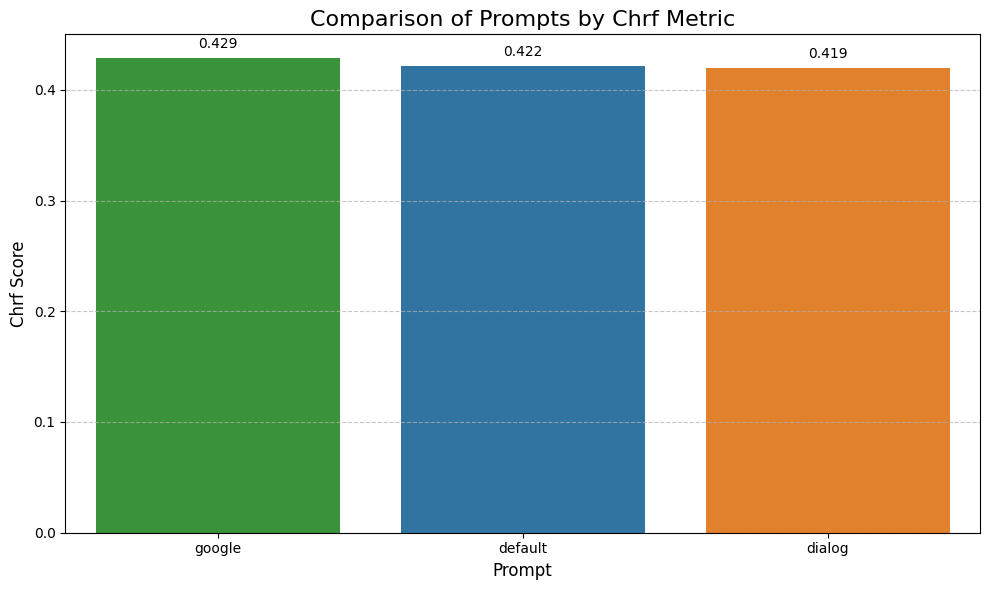

C:\Users\kajet\AppData\Local\Temp\ipykernel_33424\4041310882.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


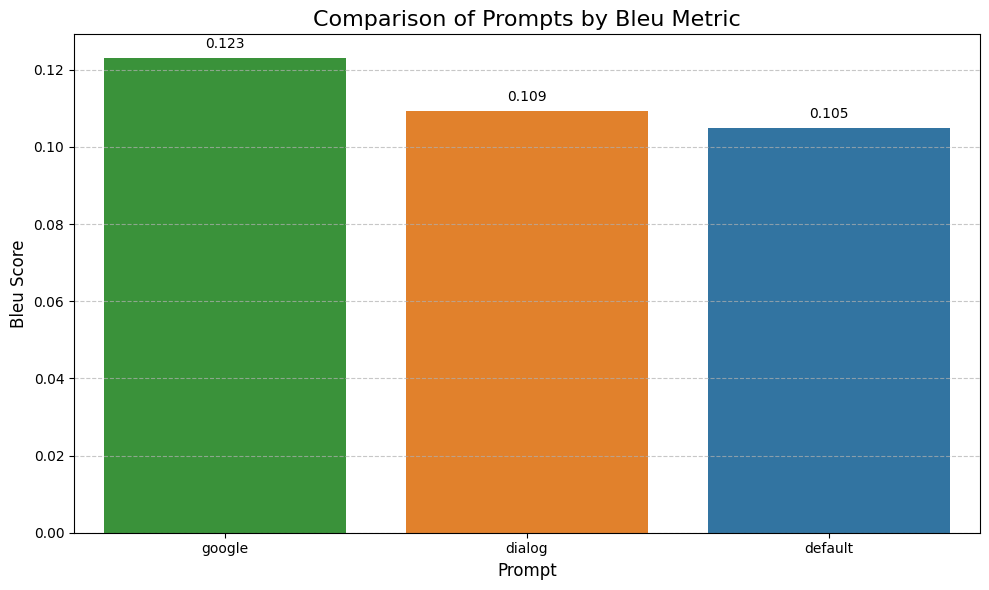

In [3]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

# Create a fixed color palette mapped to prompt names
all_prompt_names = set()
for metric in metrics:
    metric_columns = [col for col in system_results.columns if metric in col.lower()]
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        all_prompt_names.add(prompt_name)

# Sort prompt names to have a consistent order
all_prompt_names = sorted(all_prompt_names)
palette = sns.color_palette("tab10", n_colors=len(all_prompt_names))
prompt_to_color = dict(zip(all_prompt_names, palette))

for metric in metrics:
    metric_columns = [col for col in system_results.columns if metric in col.lower()]
    
    data = []
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        score = system_results[col].iloc[0]
        data.append({"Prompt": prompt_name, "Score": score})

    plot_data = pd.DataFrame(data)
    plot_data = plot_data.sort_values(by="Score", ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=plot_data,
        x="Prompt",
        y="Score",
        palette=[prompt_to_color[prompt] for prompt in plot_data["Prompt"]]
    )

    # Add score value on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Comparison of Prompts by {metric.capitalize()} Metric", fontsize=16)
    plt.xlabel("Prompt", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.6, 0.85)
    
    plt.tight_layout()
    #plt.savefig(f"figs/{metric}_prompt_formats_comparision.png", dpi=300, bbox_inches='tight')
    plt.show()

In [4]:
results = pd.read_csv("translations_scores/final_test.csv")

In [5]:
results

,en_text,pl_text,dialog,default,google,chrf_dialog,bleu_dialog,bertscore_dialog,comet_dialog,chrf_default,bleu_default,bertscore_default,comet_default,chrf_google,bleu_google,bertscore_google,comet_google
0,Hide in yer huts!,Do chałup!,Ukryjcie się w swoich chatach!,Chowajcie się w swoich chatach!,Ukryjcie się w swoich chatach!,0.131403,0.000000,0.707500,0.572362,0.130113,0.000000,0.714145,0.577467,0.131403,0.000000,0.707500,0.572362
1,Ever heard of preventive arse-whoopin'?,Wiesz co to wpierdol korekcyjny?,Czy kiedykolwiek słyszałeś o profilaktycznym k...,Czy kiedykolwiek słyszałeś o profilaktycznym l...,Słyszałeś kiedyś o zapobiegawczym skopaniu tyłka?,0.164687,0.000000,0.697734,0.764628,0.176345,0.000000,0.695778,0.738236,0.141553,0.000000,0.681884,0.725064
2,Help!,Ratunku!,Pomocy!,Pomocy!,Pomoc!,0.021097,0.000000,0.780251,0.772566,0.021097,0.000000,0.780251,0.772566,0.021368,0.000000,0.794994,0.852101
3,Mhmmm.,Mhmmm.,Mhmmm.,Mhmmm.,Mniam.,1.000000,0.177828,1.000000,0.988061,1.000000,0.177828,1.000000,0.988061,0.116667,0.000000,0.789491,0.744142
4,Come out! I'm not gonna hurt you.,"Możecie wyjść, nic wam nie zrobię.",Wyjdź! Nie zamierzam cię skrzywdzić.,Wyjdź! Nie zrobię ci krzywdy.,Wyjdź! Nie zrobię ci krzywdy.,0.144031,0.000000,0.753035,0.852146,0.254366,0.000000,0.775768,0.884397,0.254366,0.000000,0.775768,0.884396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,The Temple Guard has refused to search for her...,Wyobraź sobie że Straż odmawia jej poszukiwań.,Straż świątynna odmówiła poszukiwań? Nie mogę ...,Straż Świątynna odmówiła jej poszukiwania? Czy...,Straż Świątynna odmówiła jej poszukiwania? Czy...,0.332465,0.023980,0.748056,0.855190,0.408161,0.028518,0.750558,0.837381,0.419072,0.025099,0.749106,0.855055
9996,Doesn't matter what I believe.,"To, co ja myślę, nie ma znaczenia.","Nie ma znaczenia, co ja uważam.","Nie ma znaczenia, w co wierzę.",Nie ma znaczenia w co wierzę.,0.525217,0.080876,0.830569,0.960335,0.450292,0.041096,0.825768,0.904273,0.446032,0.041096,0.809723,0.895004
9997,Ye want to bargain? How would ye count it? Hei...,Targować się chcecie? I jak to liczycie? Od wy...,Chcesz negocjować? Jak byś to liczył? Wzrost r...,Chcesz się targować? Jak byś to policzył? Wyso...,Chcesz się targować? Jak to policzysz? Wysokoś...,0.370501,0.022417,0.800219,0.645834,0.412999,0.021973,0.816201,0.696813,0.479628,0.095785,0.853667,0.780283
9998,Eternal Fire!,Na Wieczny Ogień!,Wieczny ogień!,Wieczny ogień!,Wieczny Ogień!,0.540563,0.090697,0.898416,0.942013,0.540563,0.090697,0.898416,0.942013,0.850739,0.191802,0.933070,0.956324


In [6]:
sorted_df = results.sort_values(by='comet_dialog', ascending=True)
top_5_lowest = sorted_df.head(40)
result = top_5_lowest[['comet_dialog', 'dialog','en_text', 'pl_text']]
result

,comet_dialog,dialog,en_text,pl_text
807,0.254671,To ci dopiero!,M'lady took me aside th'other day. Accused me ...,Moja pani wzięła mnie wczoraj na rozmowę i stw...
9961,0.273004,Umblest pozdrawia.,Umblest regards.,"A kłaniam się, kłaniam."
4060,0.278968,Cholera jasna.,Bloody hell.,Kurwa mać.
2272,0.282393,Cholera jasna!,Got one word: bollocks.,Bzdury pleciesz. Tyle ci powiem.
4997,0.300501,To nie są słowa klątwy - szaleństwo! Jeśli chc...,"Va fail, elaine - cáed'mil, folie! Glaeddyv do...","Va faill, elaine – ceádmil, foile! Glaeddyv do..."
1783,0.308451,Vaporized go.,Vaporized him.,Zdezintegrował.
1289,0.321753,Na pańskie usługi.,At your service.,Kłaniam się w pas.
3893,0.321845,Bum buh bum bum bum bum...,Bum buh bum bum bum bum…,Ta ta ta ta taaata ta.
1675,0.332234,"Boors, boors everywhere.","Boors, boors everywhere.",Chamstwo wszędzie.
2306,0.339736,Koń,A horse would never make it down that mountain.,Stamtąd nie dało by się zjechać konno.
